In [105]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df

#For visualization
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
# Obtaining the Data
hr_data=pd.read_csv("HR_Analytics.csv")

# Exploring the Data

In [3]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr_data.shape

(14999, 10)

In [5]:
hr_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [6]:
# Check if any null values
hr_data.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [7]:
# Display the statistical overview of the employees
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
left_rate = hr_data.left.value_counts() / len(hr_data)
left_rate

0    0.761917
1    0.238083
Name: left, dtype: float64

# Displaying the employee counts of each department in the dataset

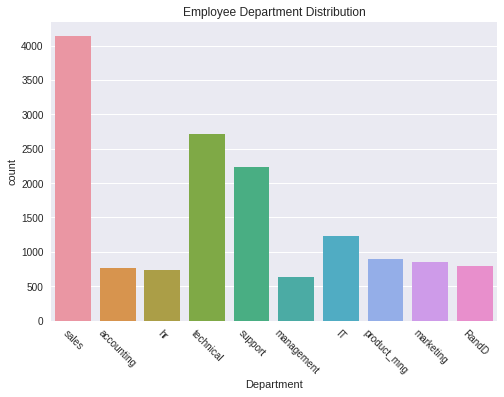

In [9]:
sns.countplot(x='sales', data=hr_data).set_title('Employee Department Distribution');
 
plt.xlabel("Department")
plt.xticks(rotation=-45)
plt.show()

# Capturing the variability for each predictor with repsect to class to make meaningful analysis

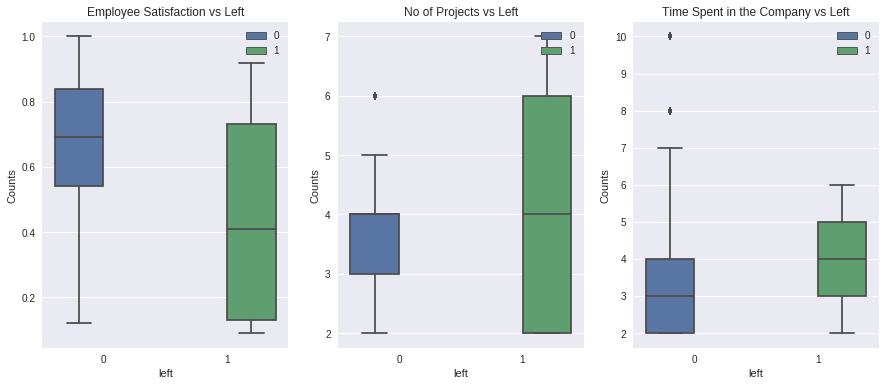

In [10]:
f, axes = plt.subplots(ncols=3, figsize=(15,6))
sns.boxplot(y="satisfaction_level", x="left", data=hr_data, hue="left", ax=axes[0]).set_title('Employee Satisfaction vs Left')
axes[0].set_ylabel('Counts')
axes[0].legend(loc="upper right")

sns.boxplot(y="number_project", x="left", data=hr_data, hue="left",ax=axes[1]).set_title('No of Projects vs Left')
axes[1].set_ylabel('Counts')
axes[1].legend(loc="upper right")

sns.boxplot(y="time_spend_company", x="left", data=hr_data, hue="left",ax=axes[2]).set_title('Time Spent in the Company vs Left')
axes[2].set_ylabel('Counts')
axes[2].legend(loc="upper right")
plt.show()


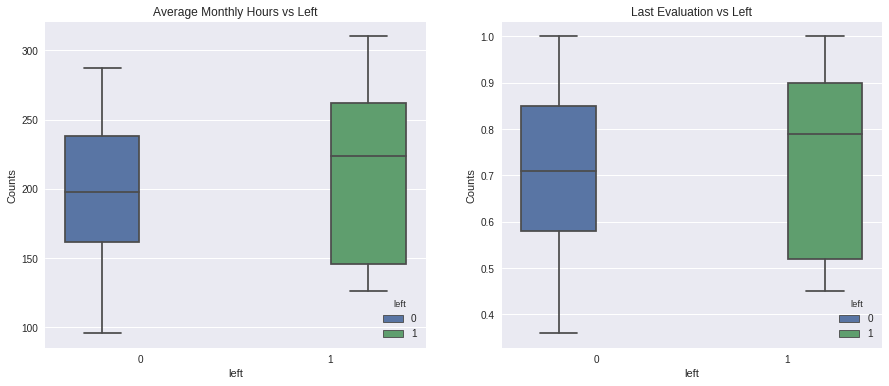

In [11]:
f, axes = plt.subplots(ncols=2, figsize=(15,6))
sns.boxplot(y="average_montly_hours", x="left", data=hr_data, hue="left", ax=axes[0]).set_title('Average Monthly Hours vs Left')
axes[0].set_ylabel('Counts')

sns.boxplot(y="last_evaluation", x="left", data=hr_data, hue="left", ax=axes[1]).set_title('Last Evaluation vs Left')
axes[1].set_ylabel('Counts')
plt.show()

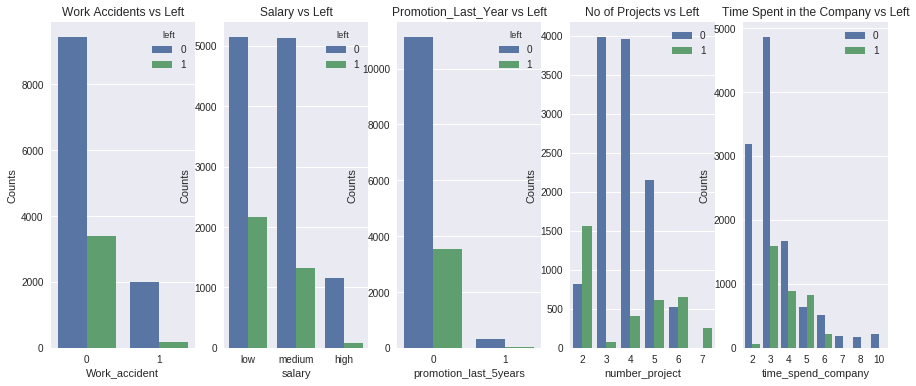

In [12]:
f, axes = plt.subplots(ncols=5, figsize=(15, 6))

sns.countplot(x='Work_accident', hue="left",data=hr_data, ax=axes[0]).set_title('Work Accidents vs Left')
axes[0].set_ylabel('Counts')
sns.countplot(x='salary', hue="left",data=hr_data, ax=axes[1]).set_title('Salary vs Left')
axes[1].set_ylabel('Counts')
sns.countplot(x='promotion_last_5years', hue="left",data=hr_data, ax=axes[2]).set_title('Promotion_Last_Year vs Left')
axes[2].set_ylabel('Counts')
sns.countplot(x="number_project", hue="left", data=hr_data,ax=axes[3]).set_title('No of Projects vs Left')
axes[3].set_ylabel('Counts')
axes[3].legend(loc="upper right")

sns.countplot(x="time_spend_company", hue="left", data=hr_data, ax=axes[4]).set_title('Time Spent in the Company vs Left')
axes[4].set_ylabel('Counts')
axes[4].legend(loc="upper right")
plt.show()

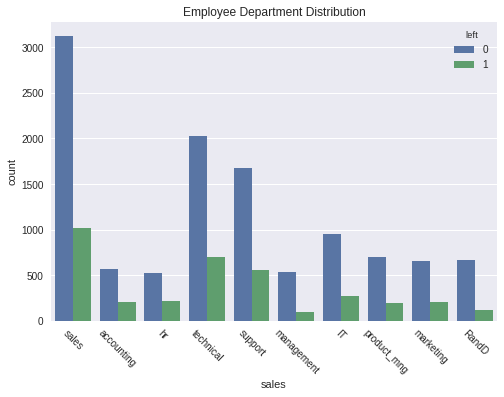

In [13]:
sns.countplot(x='sales', hue="left",data=hr_data).set_title('Employee Department Distribution');
 
# Rotate x-labels
plt.xticks(rotation=-45)
plt.show()

# Capturing the relation between predictors to find out correlation

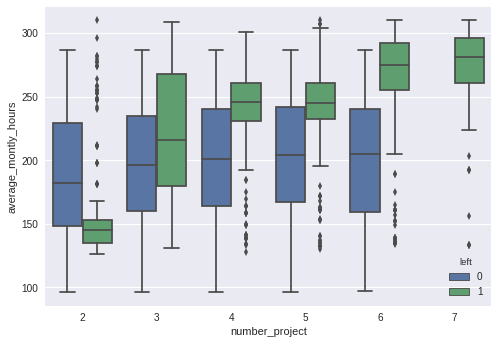

In [14]:
sns.boxplot(x="number_project", y="average_montly_hours",hue="left", data=hr_data)
sns.plt.show()

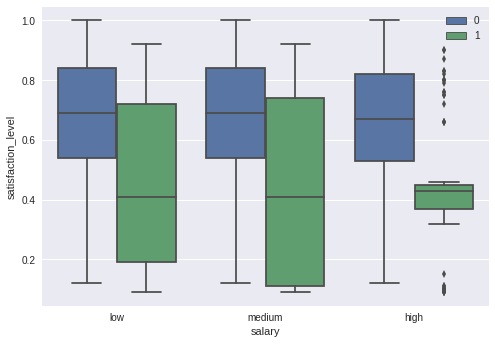

In [15]:
sns.boxplot(y="satisfaction_level", x="salary",hue="left", data=hr_data)
sns.plt.legend(loc="upper right")
sns.plt.show()

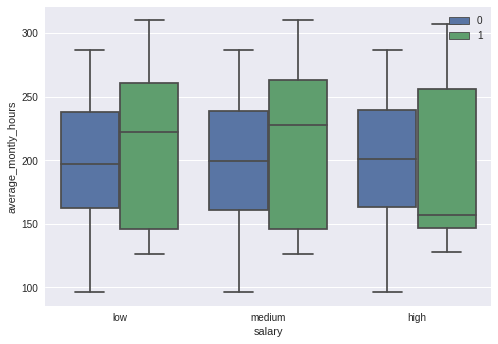

In [16]:
sns.boxplot(y="average_montly_hours", x="salary",hue="left", data=hr_data)
sns.plt.legend(loc="upper right")
sns.plt.show()

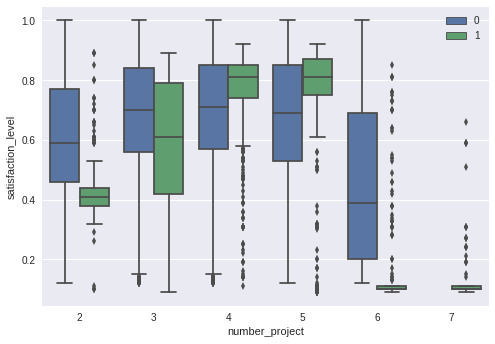

In [17]:
sns.boxplot(x="number_project", y="satisfaction_level",hue="left", data=hr_data)
sns.plt.legend(loc="upper right")
sns.plt.show()

# Renaming the columns for better understanding

In [18]:
hr_data = hr_data.rename(columns={'sales' : 'department'
                        })
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Summary Statistics by different attributes

In [19]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = hr_data.groupby("left")
turnover_Summary.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# Mapping the categorical variables to numeric 

In [20]:
# Mapping salary
salary_mapping={"low": 1, "medium": 2, "high": 3}
hr_data["salary"] = hr_data["salary"].map(salary_mapping)

hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [21]:
# Mapping departments
dept_mapping={"accounting": 1, "hr": 2, "IT": 3, "management":4, "marketing":5,"product_mng":6,"RandD":7,"sales":8,"support":9, "technical":10}
hr_data["department"] = hr_data["department"].map(dept_mapping)
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,8,1
1,0.80,0.86,5,262,6,0,1,0,8,2
2,0.11,0.88,7,272,4,0,1,0,8,2
3,0.72,0.87,5,223,5,0,1,0,8,1
4,0.37,0.52,2,159,3,0,1,0,8,1


# Preparing the data for model prediction

In [22]:
from sklearn.model_selection import train_test_split
predictors=hr_data.drop(["left"],axis=1)
target=hr_data["left"]

# Naive Bayes

## Without cross-validation

In [23]:
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [42]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,average_precision_score,recall_score,confusion_matrix

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)

Accuracy Score:79.88
Precision:0.680710227273
Recall:0.755208333333


In [44]:
print("Accuracy Score:"+str(acc_gaussian))
print("Precision:"+str(average_precision_score(y_val,y_pred)))
print("Recall:"+str(recall_score(y_val,y_pred)))
print("Confusion Matrix:")
cnf_matrix = confusion_matrix(y_pred, y_val)
print(cnf_matrix)

Accuracy Score:79.88
Precision:0.680710227273
Recall:0.755208333333
Confusion Matrix:
[[2056  188]
 [ 476  580]]


## With Cross-Validation

In [46]:
from sklearn.model_selection import cross_val_score,cross_val_predict

gaussian = GaussianNB()
scores = cross_val_score(gaussian, predictors, target, cv=10)
y_pred=cross_val_predict(gaussian,predictors,target,cv=10)

In [48]:
print("Accuracy Score:"+str(scores.mean()))
print("Precision:"+str(average_precision_score(target,y_pred)))
print("Recall:"+str(recall_score(target,y_pred)))
cnf_matrix = confusion_matrix(y_pred, target)
print("Confusion Matrix:")
print(cnf_matrix)

Accuracy Score:0.791461885361
Precision:0.67309021092
Recall:0.737888546626
Confusion Matrix:
[[9236  936]
 [2192 2635]]


# SVC Model

## SVC model without cross-validation

In [49]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)

In [57]:
print("Accuracy Score:"+str(acc_svc))
print("Precision:"+str(average_precision_score(y_val,y_pred)))
print("Recall:"+str(recall_score(y_val,y_pred)))
print("Confusion Matrix:")
cnf_matrix = confusion_matrix(y_pred, y_val)
print(cnf_matrix)

Accuracy Score:95.61
Precision:0.91721324046
Recall:0.953125
Confusion Matrix:
[[2423   36]
 [ 109  732]]


## SVC model with cross-validation

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [51]:
clf = SVC()
scores = cross_val_score(clf, predictors, target, cv=10)
print(scores)
y_pred=cross_val_predict(clf,predictors,target,cv=10)

[ 0.95536309  0.94533333  0.94733333  0.93533333  0.94133333  0.94666667
  0.95733333  0.95266667  0.9646431   0.96397598]


In [ ]:
print("Accuracy Score:"+str(scores.mean()))
print("Precision:"+str(average_precision_score(target,y_pred)))
print("Recall:"+str(recall_score(target,y_pred)))
cnf_matrix = confusion_matrix(y_pred, target)
print("Confusion Matrix:")
print(cnf_matrix)

In [41]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_pred, target)
print(cnf_matrix)

[[9236  936]
 [2192 2635]]


# K-Nearest Neighbors with n = 1 with default train test split

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_val)
knn_score = round(accuracy_score(y_pred, y_val) * 100, 2)
knn_score

95.609999999999999

In [58]:
print("Accuracy Score:"+str(knn_score))
print("Precision:"+str(average_precision_score(y_val,y_pred)))
print("Recall:"+str(recall_score(y_val,y_pred)))
print("Confusion Matrix:")
cnf_matrix = confusion_matrix(y_pred, y_val)
print(cnf_matrix)

Accuracy Score:95.61
Precision:0.91721324046
Recall:0.953125
Confusion Matrix:
[[2423   36]
 [ 109  732]]


# K-Nearest Neighbors with n = 1000 with default train test split

In [60]:
from sklearn.neighbors import KNeighborsClassifier #Each algorithmic models would be implements in their own classes called as estimator classes.
knn = KNeighborsClassifier(n_neighbors = 1000) #
knn.fit(x_train, y_train)
y_pred=knn.predict(x_val)
knn_score = round(accuracy_score(y_pred, y_val) * 100, 2)
knn_score

78.700000000000003

In [61]:
print("Accuracy Score:"+str(knn_score))
print("Precision:"+str(average_precision_score(y_val,y_pred)))
print("Recall:"+str(recall_score(y_val,y_pred)))
print("Confusion Matrix:")
cnf_matrix = confusion_matrix(y_pred, y_val)
print(cnf_matrix)

Accuracy Score:78.7
Precision:0.648832859848
Recall:0.0846354166667
Confusion Matrix:
[[2532  703]
 [   0   65]]


# K-Nearest Neighbors with n = 1 with cross validation (10 folds)

In [84]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

scores = cross_val_score(knn, predictors, target, cv=10)
y_pred=cross_val_predict(knn,predictors,target,cv=10)
print(sum(scores) / len(scores))

0.959269287142


In [85]:
print("Accuracy Score:"+str(scores.mean()))
print("Precision:"+str(average_precision_score(target,y_pred)))
print("Recall:"+str(recall_score(target,y_pred)))
cnf_matrix = confusion_matrix(y_pred, target)
print("Confusion Matrix:")
print(cnf_matrix)

Accuracy Score:0.959269287142
Precision:0.924541565064
Recall:0.955194623355
Confusion Matrix:
[[10977   160]
 [  451  3411]]


# K-Nearest Neighbors with n = 1000 with cross validation (10 folds)

In [86]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1000)

scores = cross_val_score(knn, predictors, target, cv=10)
y_pred=cross_val_predict(knn,predictors,target,cv=10)
print(sum(scores) / len(scores))

0.785118727105


In [87]:
print("Accuracy Score:"+str(scores.mean()))
print("Precision:"+str(average_precision_score(target,y_pred)))
print("Recall:"+str(recall_score(target,y_pred)))
cnf_matrix = confusion_matrix(y_pred, target)
print("Confusion Matrix:")
print(cnf_matrix)

Accuracy Score:0.785118727105
Precision:0.641317485832
Recall:0.100812097452
Confusion Matrix:
[[11416  3211]
 [   12   360]]


# Decision Trees with default train test split

In [68]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred=decisiontree.predict(x_val)
descision_tree_score = round(accuracy_score(y_pred, y_val) * 100, 2)
descision_tree_score

98.480000000000004

In [69]:
print("Accuracy Score:"+str(descision_tree_score))
print("Precision:"+str(average_precision_score(y_val,y_pred)))
print("Recall:"+str(recall_score(y_val,y_pred)))
print("Confusion Matrix:")
cnf_matrix = confusion_matrix(y_pred, y_val)
print(cnf_matrix)

Accuracy Score:98.48
Precision:0.970824376172
Recall:0.97265625
Confusion Matrix:
[[2503   21]
 [  29  747]]


# Decision Trees with cross validation (10 folds)

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score

decisiontree = DecisionTreeClassifier()
scores = cross_val_score(decisiontree, predictors, target, cv=10)
y_pred=cross_val_predict(decisiontree,predictors,target,cv=10)
print(sum(scores) / len(scores))

0.981667821452


In [93]:
print("Accuracy Score:"+str(scores.mean()))
print("Precision:"+str(average_precision_score(target,y_pred)))
print("Recall:"+str(recall_score(target,y_pred)))
cnf_matrix = confusion_matrix(y_pred, target)
print("Confusion Matrix:")
print(cnf_matrix)

Accuracy Score:0.981667821452
Precision:0.96591645182
Recall:0.973116774013
Confusion Matrix:
[[11254    96]
 [  174  3475]]


# Linear SVC without cross validation

In [75]:

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)

In [76]:
print("Accuracy Score:"+str(acc_linear_svc))
print("Precision:"+str(average_precision_score(y_val,y_pred)))
print("Recall:"+str(recall_score(y_val,y_pred)))
print("Confusion Matrix:")
cnf_matrix = confusion_matrix(y_pred, y_val)
print(cnf_matrix)

Accuracy Score:79.27
Precision:0.542296401515
Recall:0.184895833333
Confusion Matrix:
[[2474  626]
 [  58  142]]


# Linear SVC with Cross validation

In [97]:

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()

scores = cross_val_score(linear_svc, predictors, target, cv=10)
print(scores.mean())

y_pred1=cross_val_predict(linear_svc,predictors,target,cv=10)
print(y_pred1)

0.730219236986
[1 1 1 ..., 1 1 1]


In [98]:
print("Accuracy Score:"+str(scores.mean()))
print("Precision:"+str(average_precision_score(target,y_pred1)))
print("Recall:"+str(recall_score(target,y_pred1)))
cnf_matrix = confusion_matrix(y_pred1, target)
print("Confusion Matrix:")
print(cnf_matrix)

Accuracy Score:0.730219236986
Precision:0.54467686439
Recall:0.667320078409
Confusion Matrix:
[[6860 1188]
 [4568 2383]]


# Perceptron without Cross validation

In [99]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)

In [100]:
print("Accuracy Score:"+str(acc_perceptron))
print("Precision:"+str(average_precision_score(y_val,y_pred)))
print("Recall:"+str(recall_score(y_val,y_pred)))
print("Confusion Matrix:")
cnf_matrix = confusion_matrix(y_pred, y_val)
print(cnf_matrix)

Accuracy Score:76.73
Precision:0.616363636364
Recall:0.0
Confusion Matrix:
[[2532  768]
 [   0    0]]


# Perceptron with Cross validation

In [103]:
perceptron = Perceptron()

scores = cross_val_score(perceptron, predictors, target, cv=10)
print(scores.mean())

y_pred1=cross_val_predict(perceptron,predictors,target,cv=10)


0.75871605617


In [104]:
print("Accuracy Score:"+str(scores.mean()))
print("Precision:"+str(average_precision_score(target,y_pred1)))
print("Recall:"+str(recall_score(target,y_pred1)))
cnf_matrix = confusion_matrix(y_pred1, target)
print("Confusion Matrix:")
print(cnf_matrix)

Accuracy Score:0.75871605617
Precision:0.138485401141
Recall:0.000560067208065
Confusion Matrix:
[[11378  3569]
 [   50     2]]
